In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [20]:
najib = pd.read_csv('NajibRazak.csv')
print(najib.shape)
najib.head()

(149, 7)


,centre,followers_count,followers_ids,friends_count,id,name,screen_name
0,16389180,4109573,"[987878778654277634, 987879958662995968, 98787...",157,16389180,Mohd Najib Tun Razak,NajibRazak
1,16389180,12904,"[447684789, 2499507654, 85227538, 804612930150...",14,811786659343630336,TN50,myTN50
2,16389180,20654,"[977705789694488578, 200038299, 98493530809237...",618,848744329208152064,TheRakyat,TheRakyatRasmi
3,16389180,1029079,"[987879024931127296, 987878842244190209, 98787...",232,375146901,Donald Tusk,donaldtusk
4,16389180,865084,"[987797127983136769, 987872875364454401, 98787...",380,196994616,Donald Tusk,eucopresident


In [21]:
id_unique = np.unique(najib.id.values).tolist()

In [22]:
import json
followers = []
for i in range(najib.shape[0]):
    followers += json.loads(najib.followers_ids.iloc[i])
followers = list(set(followers))

In [23]:
len(followers)

418323

In [30]:
followers = [i for i in followers if i in id_unique]
len(followers)

96

In [33]:
true_followers = []
for i in range(najib.shape[0]):
    follows = json.loads(najib.followers_ids.iloc[i])
    follows = [k for k in follows if k in followers]
    true_followers.append(follows)

In [35]:
najib['true_followers'] = true_followers

In [36]:
najib.head()

,centre,followers_count,followers_ids,friends_count,id,name,screen_name,true_followers
0,16389180,4109573,"[987878778654277634, 987879958662995968, 98787...",157,16389180,Mohd Najib Tun Razak,NajibRazak,[]
1,16389180,12904,"[447684789, 2499507654, 85227538, 804612930150...",14,811786659343630336,TN50,myTN50,"[531041640, 16389180, 848744329208152064, 2961..."
2,16389180,20654,"[977705789694488578, 200038299, 98493530809237...",618,848744329208152064,TheRakyat,TheRakyatRasmi,[132630648]
3,16389180,1029079,"[987879024931127296, 987878842244190209, 98787...",232,375146901,Donald Tusk,donaldtusk,[]
4,16389180,865084,"[987797127983136769, 987872875364454401, 98787...",380,196994616,Donald Tusk,eucopresident,[]


In [76]:
G = nx.Graph()

In [77]:
for i in range(najib.shape[0]):
    size = najib.followers_count.iloc[i]/najib.friends_count.iloc[i]
    if size == np.inf:
        size = 1
    size = size / 100
    G.add_node(najib.id.iloc[i],name=najib.name.iloc[i],size=size)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  


In [78]:
for i in range(najib.shape[0]):
    for k in najib.true_followers.iloc[i]:
        G.add_edge(najib.id.iloc[i],k)

In [79]:
sizes = [G.node[node]['size'] for node in G]
names = [G.node[node]['name'] for node in G]

In [84]:
labeldict=dict(zip(G.nodes(),names))

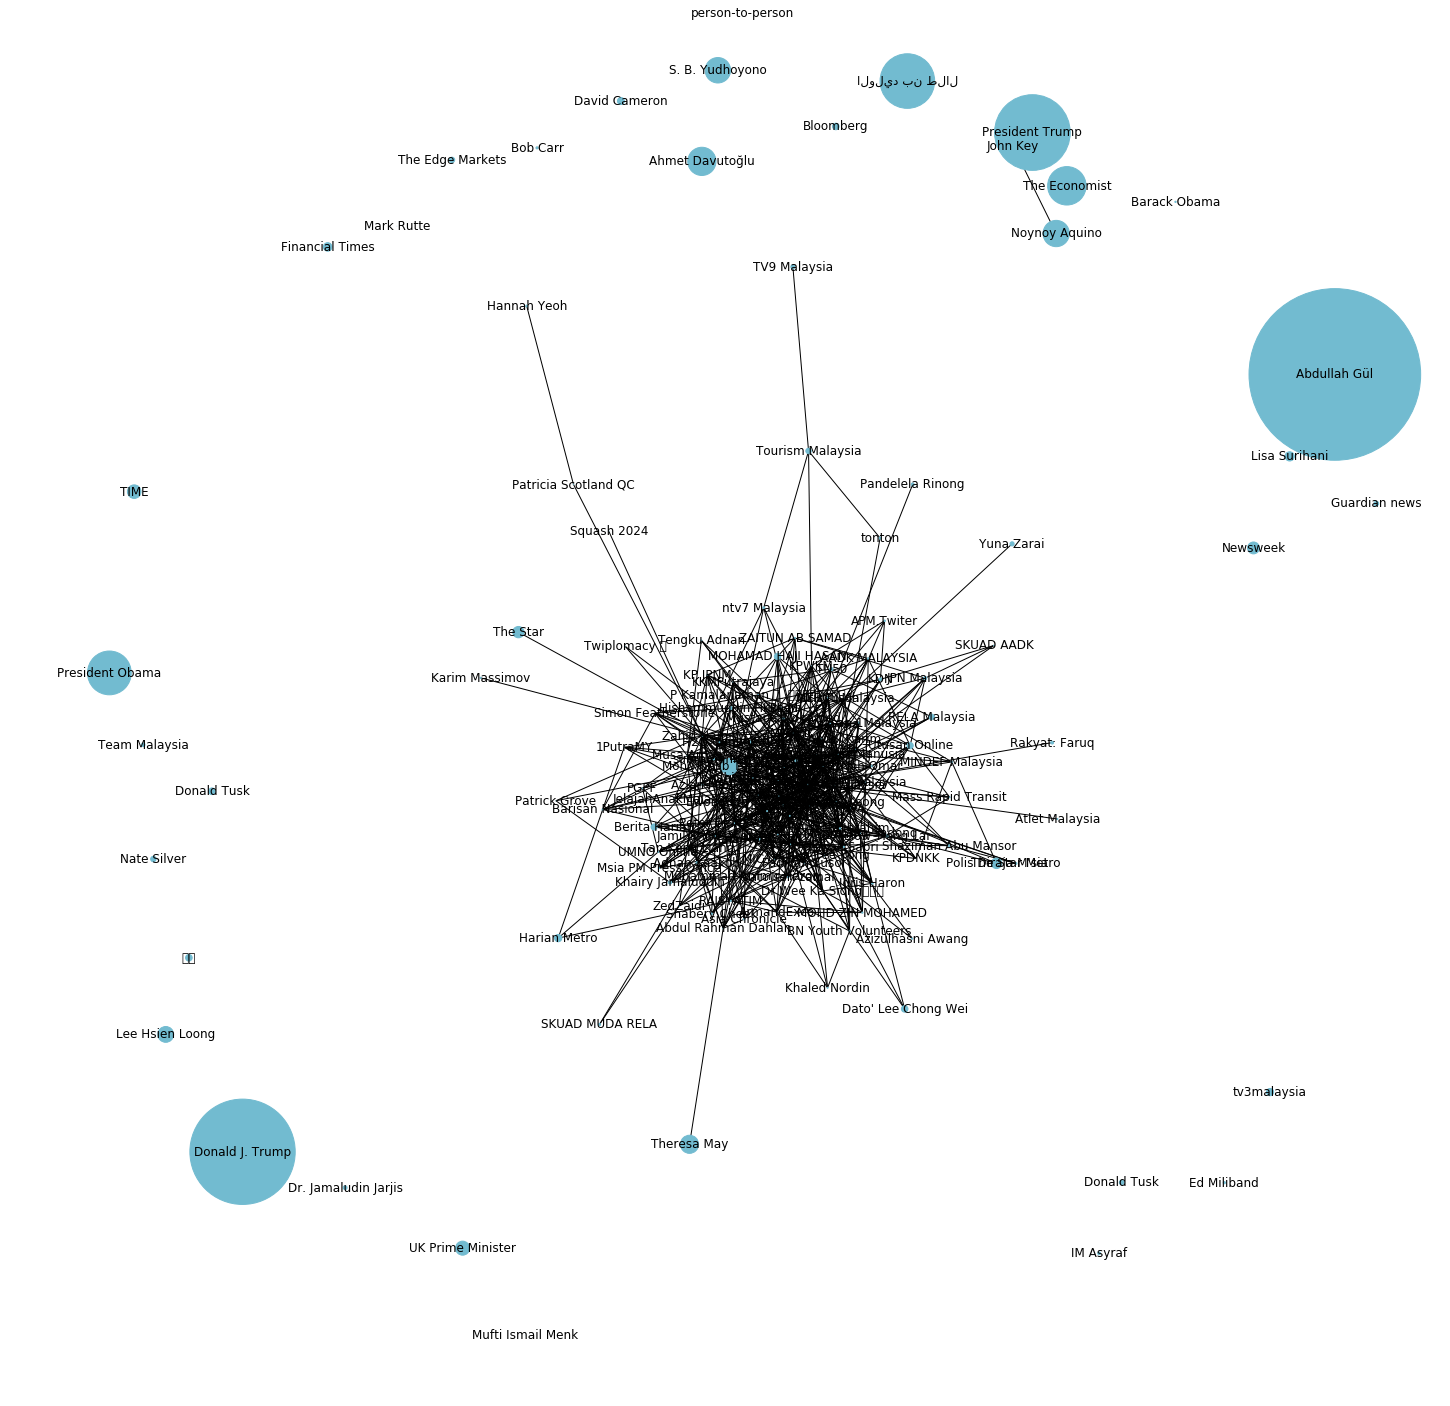

In [85]:
plt.figure(figsize=(25,25))
plt.axis('equal')
plt.title('person-to-person')
nx.draw(G, node_color='#72bbd0',
        labels=labeldict,with_labels=1,
        node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50))

In [100]:
similarity_matrix = np.zeros((najib.shape[0],len(followers)))

In [101]:
for i in range(najib.shape[0]):
    for k in najib.true_followers.iloc[i]:
        similarity_matrix[i,followers.index(k)] += 1

In [102]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10, algorithm='auto', metric='cosine').fit(similarity_matrix)

In [103]:
xtest = similarity_matrix[0, :]
xtest = xtest.reshape(1, -1)
distances, indices = neighbors.kneighbors(xtest)
for no, i in enumerate(indices[0]):
    print(najib.name.iloc[i], (1-distances[0][no]/np.pi/2))

KPKT 0.8408450569081046
Ismail Sabri 0.8408450569081046
Nate Silver 0.8408450569081046
David Cameron 0.8408450569081046
Ed Miliband 0.8408450569081046
Jamil Khir Baharom 0.8408450569081046
KPWKM 0.8408450569081046
Dr Maximus Ongkili 0.8408450569081046
Zahid Hamidi 0.8408450569081046
Raja Nong Chik 0.8408450569081046


In [104]:
xtest = similarity_matrix[1, :]
xtest = xtest.reshape(1, -1)
distances, indices = neighbors.kneighbors(xtest)
for no, i in enumerate(indices[0]):
    print(najib.name.iloc[i], (1-distances[0][no]/np.pi/2))

TN50 1.0
Ahmad Razif Abd Rahman 0.9185047171948548
Azlan Man 0.9169356734282729
MOHAMAD HAJI HASAN 0.9145194795544213
Adnan Yaakob 0.9133946131527177
MIDA 0.9090543182332027
DS Wan Junaidi TJ 0.9051533652050409
MCA 0.9051533652050409
Musa Aman 0.9009999711006464
Berita Harian 0.9009999711006464


In [107]:
xtest = similarity_matrix[5, :]
xtest = xtest.reshape(1, -1)
distances, indices = neighbors.kneighbors(xtest)
for no, i in enumerate(indices[0]):
    print(najib.name.iloc[i], (1-distances[0][no]/np.pi/2))

Dr Novandri 1.0
dato seri zainal 0.9280178093779867
Perdana Fellows 0.9192075338757537
KPISM 0.9158714165878635
MIDA 0.9145194795544213
KKMPutrajaya 0.9058197903442443
JelajahAnakMalaysia 0.9058197903442443
Rakyat: Faruq 0.9058197903442443
MINDEF Malaysia 0.9058197903442443
Musa Aman 0.9058197903442443
